In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [7]:
dfmain = pd.read_csv('bankfull_add.csv')

dfmain['education']=np.where(dfmain['education'] =='basic.9y', 'Basic', dfmain['education'])
dfmain['education']=np.where(dfmain['education'] =='basic.6y', 'Basic', dfmain['education'])
dfmain['education']=np.where(dfmain['education'] =='basic.4y', 'Basic', dfmain['education'])
dfmain.head()

,age,job,marital,education,contact,month,day,duration,campaign,pdays,...,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y,default,housing,loan
0,56,housemaid,married,Basic,telephone,may,mon,261,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
1,57,services,married,high.school,telephone,may,mon,149,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
2,37,services,married,high.school,telephone,may,mon,226,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0
3,40,admin.,married,Basic,telephone,may,mon,151,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
4,56,services,married,high.school,telephone,may,mon,307,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1


In [8]:
#subscription vs. no-subscription records
counts = dfmain.y.value_counts()
nosubscribe = counts[0]
subscribe = counts[1]
perc_nosub = (nosubscribe/(nosubscribe+subscribe))*100
perc_sub = (subscribe/(nosubscribe+subscribe))*100
print('There were {} no-subscription records ({:.3f}%) and {} subscription records ({:.3f}%).'.format(nosubscribe, perc_nosub, subscribe, perc_sub))

There were 36548 no-subscription records (88.735%) and 4640 subscription records (11.265%).


Text(0.5, 0, 'y (0:no-subscription, 1:subscription)')

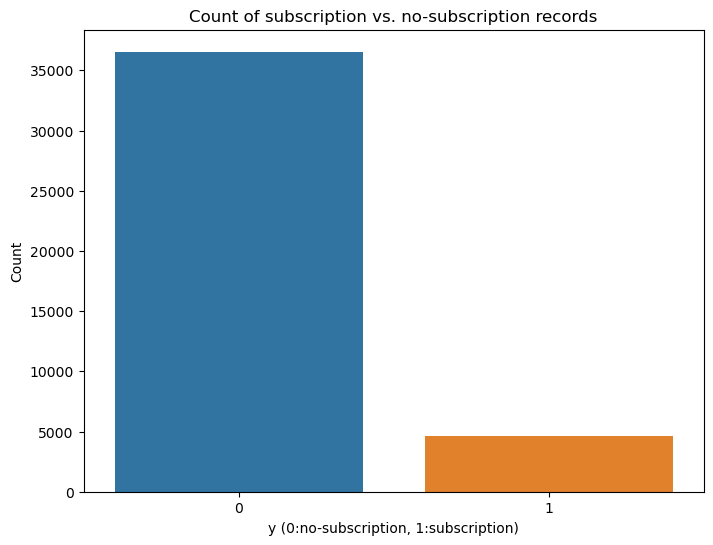

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of subscription vs. no-subscription records')
plt.ylabel('Count')
plt.xlabel('y (0:no-subscription, 1:subscription)')

In [45]:
# Comparing average subsciption and no-subscription for numeric predictors
pd.options.display.float_format = "{:,.2f}".format
dfmain.loc[:,['y','age','duration','campaign','pdays','previous','empvarrate','conspriceidx','consconfidx','euribor3m','nremployed']].groupby('y').mean()

,age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed
y,,,,,,,,,,
0,39.91,220.84,2.63,984.11,0.13,0.25,93.60,-40.59,3.81,"5,176.17"
1,40.91,553.19,2.05,792.04,0.49,-1.23,93.35,-39.79,2.12,"5,095.12"


In [46]:
#Correlation matrix
corr = dfmain.loc[:,['age','duration','campaign','pdays','previous','empvarrate','conspriceidx','consconfidx','euribor3m','nremployed']].corr()
corr

,age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50
empvarrate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91
conspriceidx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52
consconfidx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95
nremployed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00


Text(0.5, 1.0, 'Heatmap of Correlation')

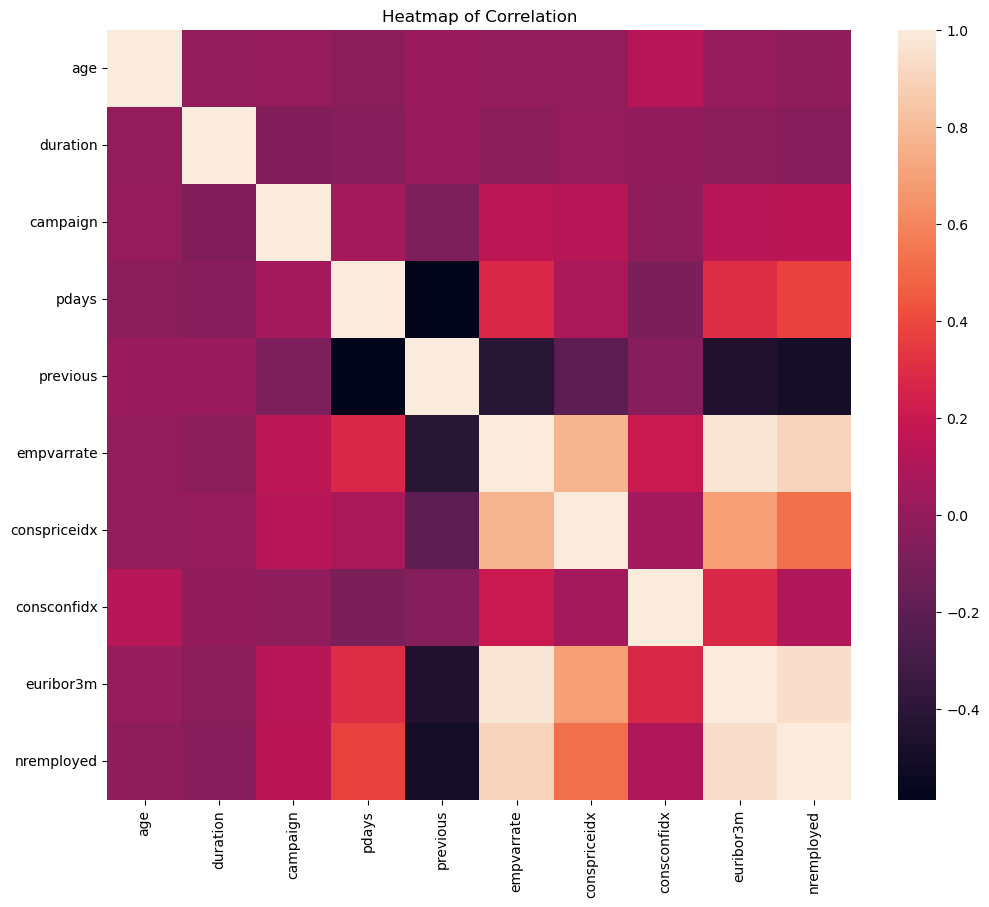

In [17]:
#heatmap
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [28]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(dfmain)) < 0.9
train = dfmain[mask]
test = dfmain[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (37003, 21)
Test Shape: (4185, 21)


In [29]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

#how many random samples from no-subscription records do we need?
no_of_subs = train.y.value_counts()[1]
print('There are {} subscription records in the train data.'.format(no_of_subs))

There are 4186 subscription records in the train data.


In [30]:
#randomly selecting 4158 random no-subscription records
no_subs = train[train['y'] == 0]
subs = train[train['y'] == 1]
selected = no_subs.sample(no_of_subs)
selected.head()

,age,job,marital,education,contact,month,day,duration,campaign,pdays,...,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y,default,housing,loan
28713,46,services,married,high.school,telephone,may,thu,79,2,999,...,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0,0,0,0
19994,50,admin.,married,university.degree,cellular,aug,thu,508,4,999,...,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0,1,1
19094,38,technician,married,university.degree,telephone,aug,mon,280,10,999,...,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0,0,0
4173,38,blue-collar,married,high.school,telephone,may,wed,173,1,999,...,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0,0,1,0
13438,29,technician,single,university.degree,telephone,jul,wed,357,7,999,...,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0,0,0,1


In [31]:
#concatenating both into a subsample data set with equal y distribution
selected.reset_index(drop=True, inplace=True)
subs.reset_index(drop=True, inplace=True)

subsample = pd.concat([selected, subs])
len(subsample)

8372

Text(0.5, 0, 'y (0:no-subscription, 1:subscription)')

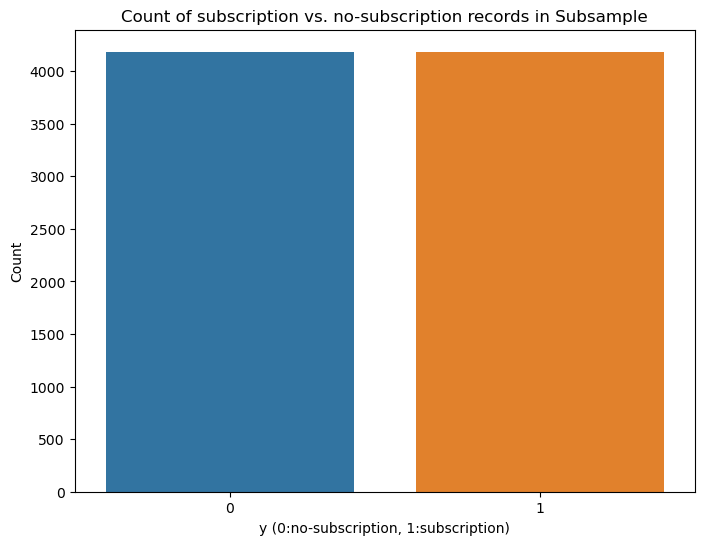

In [32]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

new_counts = subsample.y.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of subscription vs. no-subscription records in Subsample')
plt.ylabel('Count')
plt.xlabel('y (0:no-subscription, 1:subscription)')

In [33]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = subsample[['job', 'marital', 'education', 'contact', 'month', 'day', 'poutcome']]
enc.fit(X)
enc.categories_
myvars = enc.transform(subsample[['job', 'marital', 'education', 'contact', 'month', 'day', 'poutcome']]).toarray()
df2 = pd.DataFrame(myvars, columns=enc.get_feature_names_out(['job', 'marital', 'education', 'contact', 'month', 'day', 'poutcome']))
d = dict.fromkeys(df2.select_dtypes(np.float64).columns, np.int64)
df2 = df2.astype(d)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8372 entries, 0 to 8371
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   job_admin.                     8372 non-null   int64
 1   job_blue-collar                8372 non-null   int64
 2   job_entrepreneur               8372 non-null   int64
 3   job_housemaid                  8372 non-null   int64
 4   job_management                 8372 non-null   int64
 5   job_retired                    8372 non-null   int64
 6   job_self-employed              8372 non-null   int64
 7   job_services                   8372 non-null   int64
 8   job_student                    8372 non-null   int64
 9   job_technician                 8372 non-null   int64
 10  job_unemployed                 8372 non-null   int64
 11  job_unknown                    8372 non-null   int64
 12  marital_divorced               8372 non-null   int64
 13  marital_married   

In [34]:
subsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8372 entries, 0 to 8371
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           8372 non-null   int64  
 1   job           8372 non-null   object 
 2   marital       8372 non-null   object 
 3   education     8372 non-null   object 
 4   contact       8372 non-null   object 
 5   month         8372 non-null   object 
 6   day           8372 non-null   object 
 7   duration      8372 non-null   int64  
 8   campaign      8372 non-null   int64  
 9   pdays         8372 non-null   int64  
 10  previous      8372 non-null   int64  
 11  poutcome      8372 non-null   object 
 12  empvarrate    8372 non-null   float64
 13  conspriceidx  8372 non-null   float64
 14  consconfidx   8372 non-null   float64
 15  euribor3m     8372 non-null   float64
 16  nremployed    8372 non-null   float64
 17  y             8372 non-null   int64  
 18  default       8372 non-null 

In [35]:
subsample.drop(['job', 'marital', 'education', 'contact', 'month', 'day', 'poutcome'], axis=1, inplace=True)

df = pd.merge(subsample, df2, right_index=True, left_index=True)
df.info()

X = df.drop('y', axis=1)
y = df['y']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8372 entries, 0 to 8371
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            8372 non-null   int64  
 1   duration                       8372 non-null   int64  
 2   campaign                       8372 non-null   int64  
 3   pdays                          8372 non-null   int64  
 4   previous                       8372 non-null   int64  
 5   empvarrate                     8372 non-null   float64
 6   conspriceidx                   8372 non-null   float64
 7   consconfidx                    8372 non-null   float64
 8   euribor3m                      8372 non-null   float64
 9   nremployed                     8372 non-null   float64
 10  y                              8372 non-null   int64  
 11  default                        8372 non-null   int64  
 12  housing                        8372 non-null   i

In [36]:
#t-SNE
from sklearn.manifold import TSNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

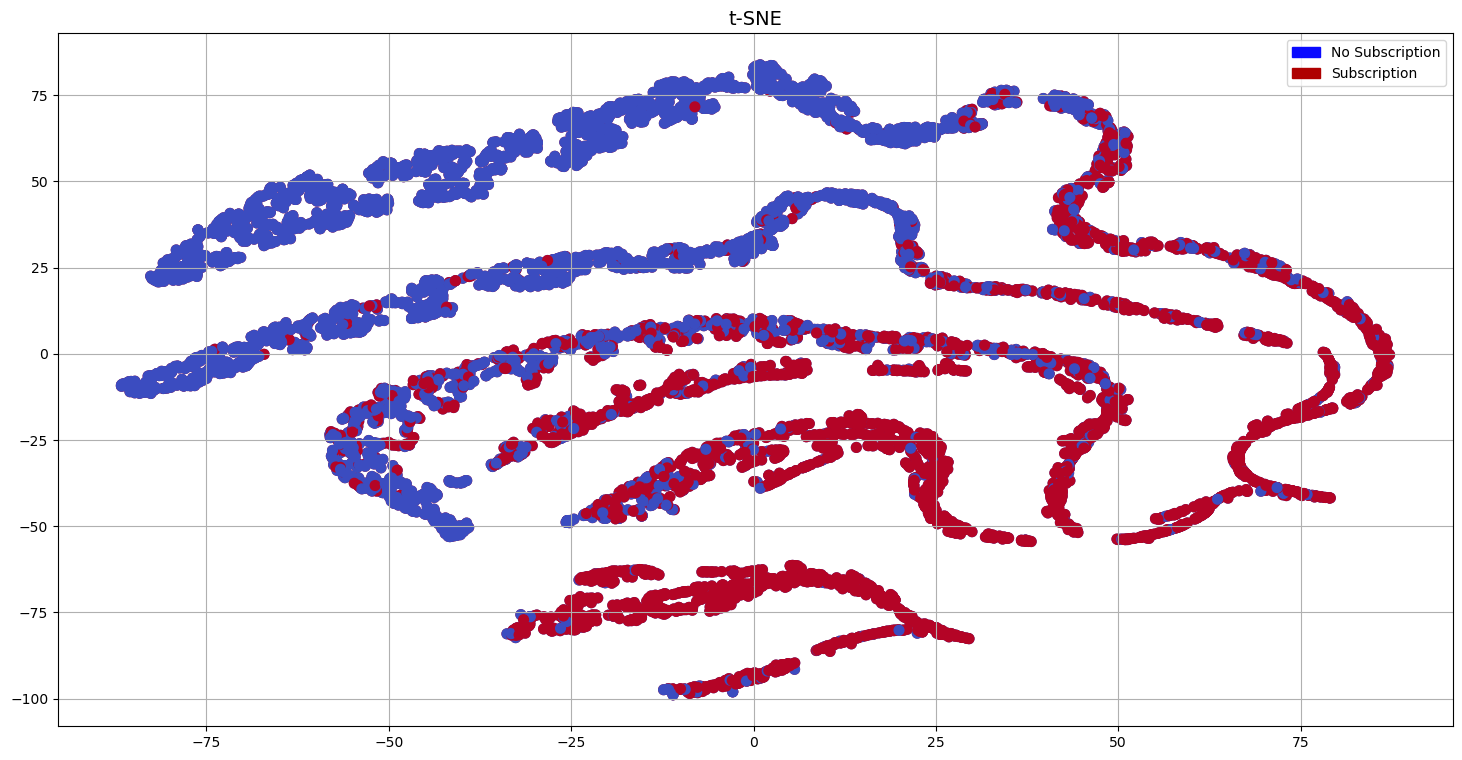

In [37]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(18,9))
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Subscription')
red_patch = mpatches.Patch(color='#AF0000', label='Subscription')
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Subscription', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Subscription', linewidths=2)
ax.set_title('t-SNE', fontsize=14)
ax.grid(True)
ax.legend(handles=[blue_patch, red_patch])

In [38]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [39]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('y_shapes:\n', 'y_train:', 'y_test:\n', y_train.shape, y_test.shape)

X_shapes:
 X_train: X_test:
 (6697, 55) (1675, 55) 

y_shapes:
 y_train: y_test:
 (6697,) (1675,)


In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
# from lightgbm import LGBMClassifier

LR: 0.925849 (0.006893)
LDA: 0.930424 (0.008656)
KNN: 0.905529 (0.010860)
CART: 0.827029 (0.012429)
SVM: 0.912306 (0.009543)
XGB: 0.938395 (0.007780)
RF: 0.935709 (0.007981)


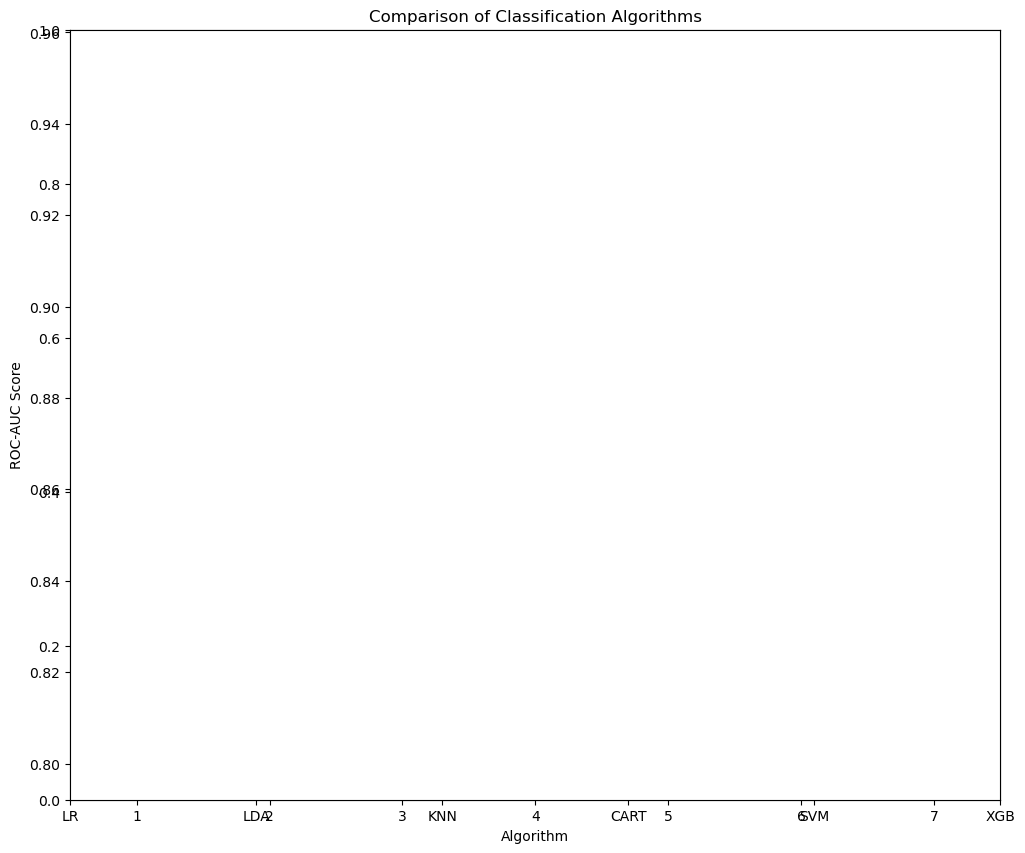

In [43]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
# models.append(('LGB', LGBMClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
	
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()